**Chi-Square test**
  * Goodness of fit

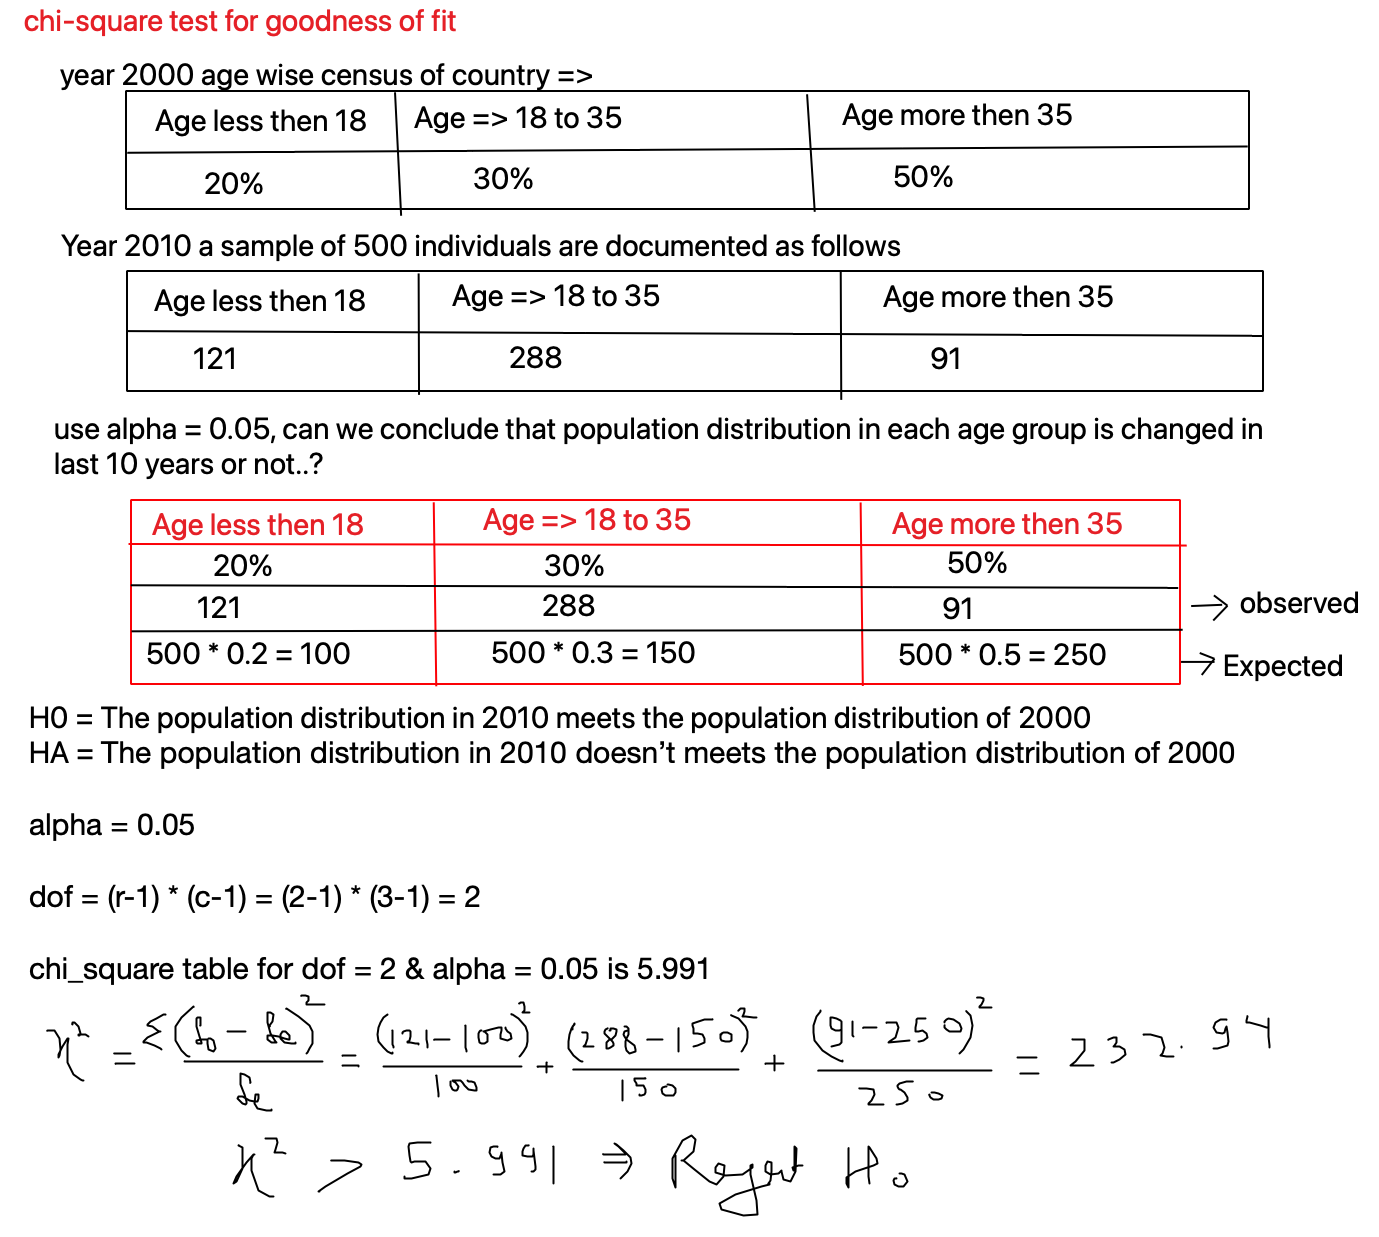

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

In [2]:
#USA national population distribution
national = pd.DataFrame({"Category": ["White" , "Hispanic" , "Black" , "Asian" , "Others"],
                         "Count" : [100000,60000,50000,15000,35000]})
national

,Category,Count
0,White,100000
1,Hispanic,60000
2,Black,50000
3,Asian,15000
4,Others,35000


In [3]:
minnesota = pd.DataFrame({"Category": ["White" , "Hispanic" , "Black" , "Asian" , "Others"],
                         "Count" : [600,300,250,75,150]})
minnesota

,Category,Count
0,White,600
1,Hispanic,300
2,Black,250
3,Asian,75
4,Others,150


* H0 = Minnesota Population distribution is same as national population distribution
* HA = Minnesota Population distribution is different as national population distribution

In [4]:
national['Count'].sum()

260000

In [5]:
observed_table = minnesota['Count']
observed_table

,Count
0,600
1,300
2,250
3,75
4,150


In [6]:
national_ratio = national['Count']/national['Count'].sum()
national_ratio

,Count
0,0.384615
1,0.230769
2,0.192308
3,0.057692
4,0.134615


In [7]:
expected = national_ratio * minnesota['Count'].sum()
expected

,Count
0,528.846154
1,317.307692
2,264.423077
3,79.326923
4,185.096154


In [8]:
chi_square_stats = np.sum((observed_table - expected)**2/expected)
chi_square_stats

18.194805194805177

In [9]:
crit = stats.chi2.ppf(q = 0.95, df = 4)
crit

9.487729036781154

In [10]:
if chi_square_stats > crit:
    print("Reject H0 , which means Minnesota Population distribution is different as national population distribution")
else:
    print("Accept H0, which means Minnesota Population distribution is same as national population distribution")

Reject H0 , which means Minnesota Population distribution is different as national population distribution


**Ci square of Idependency**

In [11]:
voter_race = np.random.choice(a = ["asian","black","hispanic","other","white"],
                              p = [0.05,0.15,0.25,0.05,0.5],
                              size=1000)

#voter_race

voter_party = np.random.choice(a = ["democrat","independent","republican"],
                              p = [0.4,0.2,0.4],
                              size=1000)

#voter_party

In [12]:
voters = pd.DataFrame({"race":voter_race,
                      "party":voter_party})

voters

,race,party
0,other,republican
1,hispanic,independent
2,white,democrat
3,white,democrat
4,white,democrat
...,...,...
995,white,republican
996,black,republican
997,white,republican
998,white,republican


**Perform Hypothesis testing to test if voting choice is race dependent**

In [13]:
voters_tab = pd.crosstab(voters.race, voters.party, margins = True)
voters_tab

party,democrat,independent,republican,All
race,,,,
asian,25,12,27,64
black,53,26,50,129
hispanic,97,54,105,256
other,20,7,13,40
white,176,99,236,511
All,371,198,431,1000


In [29]:
observed = voters_tab.iloc[0:5,0:3]
observed

party,democrat,independent,republican
race,,,
asian,25,12,27
black,53,26,50
hispanic,97,54,105
other,20,7,13
white,176,99,236


* H0 = There is no effect of race on choice of party
* HA = There is some effect of race on choice of party

In [30]:
expected = stats.chi2_contingency(observed)[3]
expected

array([[ 23.744,  12.672,  27.584],
       [ 47.859,  25.542,  55.599],
       [ 94.976,  50.688, 110.336],
       [ 14.84 ,   7.92 ,  17.24 ],
       [189.581, 101.178, 220.241]])

In [41]:
#Chi square stats

chi_square_stats = np.sum(((observed - expected)**2 / expected).values)
chi_square_stats

6.847559851199755

In [42]:
#critical value
crit = stats.chi2.ppf(q = 0.95, df = 8)
crit

15.50731305586545

In [43]:
#Conclude hypothesis
if chi_square_stats > crit:
    print("Reject H0 , which means There is some effect of race on choice of party")
else:
    print("Accept H0, which means There is no effect of race on choice of party")

Accept H0, which means There is no effect of race on choice of party
